In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import subprocess, cv2, json, os, sys, shutil, pyk4a, time
import numpy as np, matplotlib.pyplot as plt
from kinectacq.acquisition import start_recording
from kinectacq.paths import DATA_DIR, ensure_dir

### Set up recording location and duration info

In [3]:
import datetime

In [4]:
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
timestamp

'2023-01-27_10-30-29'

In [5]:
filename_prefix = DATA_DIR / 'test_recording' / timestamp
recording_length = 10

In [6]:
ensure_dir(filename_prefix)

In [7]:
filename_prefix

PosixPath('/home/dattalab/code/kinectacq/data/test_recording/2023-01-27_10-30-29')

### Get camera information

In [8]:
!k4arecorder --list

Index:0	Serial:000412721712	Color:1.6.110	Depth:1.6.79
Index:1	Serial:000567321712	Color:1.6.110	Depth:1.6.79
Index:2	Serial:000774310512	Color:1.6.110	Depth:1.6.79
Index:3	Serial:000161621712	Color:1.6.110	Depth:1.6.79
Index:4	Serial:000570221712	Color:1.6.110	Depth:1.6.79
Index:5	Serial:000621521712	Color:1.6.110	Depth:1.6.79


### Set up devices
- each k4a device needs to be configured
- multi-camera rigs need to set up the WiredSyncMode
    - Master = WiredSyncMode.MASTER
    - Subordinate = WiredSyncMode.SUBORDINATE
    - subordinate_delay_off_master_usec=640 (master samples every 900usec)

In [9]:
from pyk4a import (
    PyK4A,
    Config,
    ColorResolution,
    DepthMode,
    WiredSyncMode,
)

In [10]:
devices = {
    "master": {
        "id": 0,
        "pyk4a_config": {
            "color_resolution": ColorResolution.RES_720P,
            "depth_mode": DepthMode.NFOV_UNBINNED,
            #"synchronized_images_only": False,
            #"wired_sync_mode": WiredSyncMode.MASTER,
        },
        "process_kwargs": {
            "display_frames": True,
            "display_time": False,
        },
    },
    "subordinate": {
        "id": 1,
        "pyk4a_config": {
            "color_resolution": ColorResolution.RES_720P,
            "depth_mode": DepthMode.NFOV_UNBINNED,
            #"synchronized_images_only": False,
            #"wired_sync_mode": WiredSyncMode.SUBORDINATE,
        },
        "process_kwargs": {
            "display_frames": False,
            "display_time": False,
        },
    }
}

### Testing

In [11]:
from multiprocessing import Process, Queue
from kinectacq.acquisition import capture_from_azure 

In [12]:
device_name = "master"

In [13]:
devices[device_name]["id"]

0

In [14]:
devices[device_name]["pyk4a_config"]

{'color_resolution': <ColorResolution.RES_720P: 1>,
 'depth_mode': <DepthMode.NFOV_UNBINNED: 2>}

In [15]:
k4a_obj = PyK4A(
    Config(**devices[device_name]["pyk4a_config"]),
    device_id=devices[device_name]["id"],
)

In [16]:
k4a_obj

In [17]:
k4a_obj.start()

In [18]:
capture = k4a_obj.get_capture()

In [19]:
capture.color.shape, capture.ir.shape, capture.depth.shape

((720, 1280, 4), (576, 640), (576, 640))

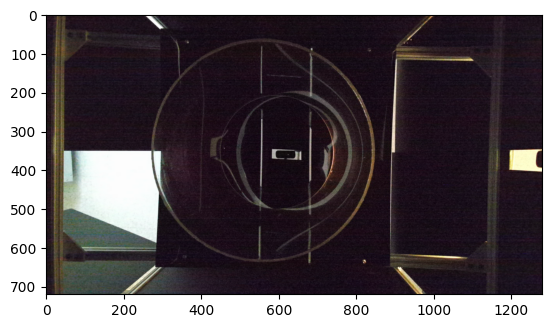

In [20]:
plt.imshow(capture.color)

/tmp/ipykernel_144378/3398262759.py:2: RuntimeWarning: divide by zero encountered in log
  ax1.matshow(np.log(capture.ir+1))


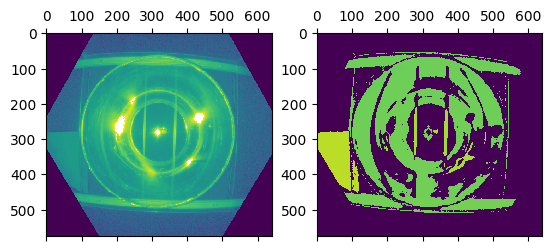

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.matshow(np.log(capture.ir+1))
ax2.matshow(np.log(capture.depth+1))

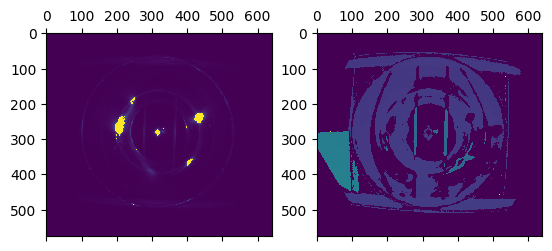

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.matshow((capture.ir))
ax2.matshow((capture.depth))

In [27]:
capture.ir.dtype

dtype('uint16')

(array([364052.,   2028.,    398.,      0.,      0.,      0.,      0.,
             0.,      0.,   2162.]),
 array([    0. ,  6553.5, 13107. , 19660.5, 26214. , 32767.5, 39321. ,
        45874.5, 52428. , 58981.5, 65535. ]),
 <BarContainer object of 10 artists>)

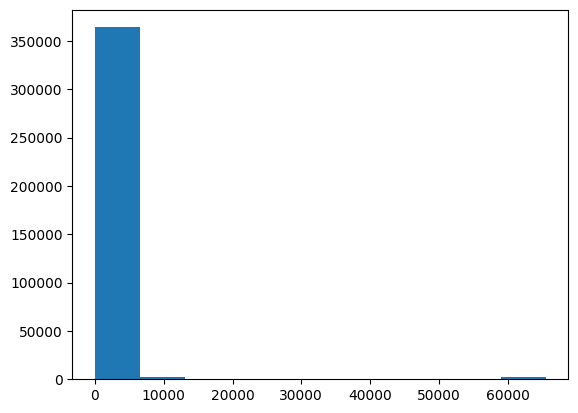

In [26]:
plt.hist(capture.ir.flatten())

In [22]:
device_name = "subordinate"

In [23]:
devices[device_name]["pyk4a_config"]

{'color_resolution': <ColorResolution.RES_720P: 1>,
 'depth_mode': <DepthMode.NFOV_UNBINNED: 2>}

In [24]:
k4a_obj2 = PyK4A(
    Config(**devices[device_name]["pyk4a_config"]),
    device_id=devices[device_name]["id"],
)

In [25]:
k4a_obj2.start()

In [26]:
capture = k4a_obj2.get_capture()

In [27]:
capture.color.shape, capture.ir.shape, capture.depth.shape

((720, 1280, 4), (576, 640), (576, 640))

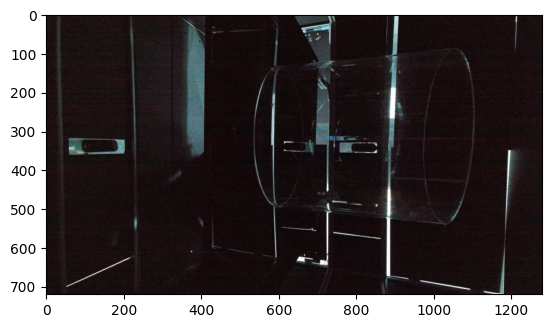

In [28]:
plt.imshow(capture.color)

/tmp/ipykernel_5204/3398262759.py:2: RuntimeWarning: divide by zero encountered in log
  ax1.matshow(np.log(capture.ir+1))


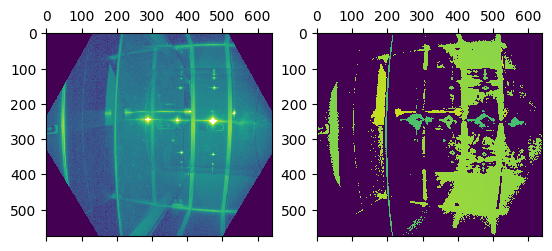

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.matshow(np.log(capture.ir+1))
ax2.matshow(np.log(capture.depth+1))

/tmp/ipykernel_5204/1346358255.py:8: RuntimeWarning: divide by zero encountered in log
  ax1.matshow(np.log(capture.ir+1))


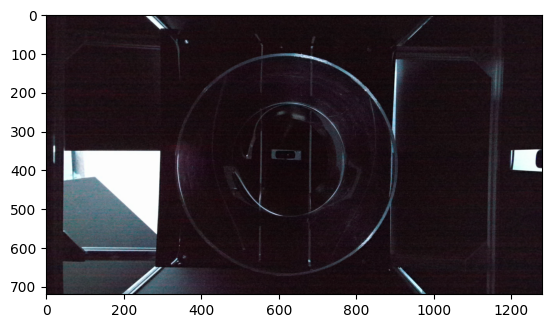

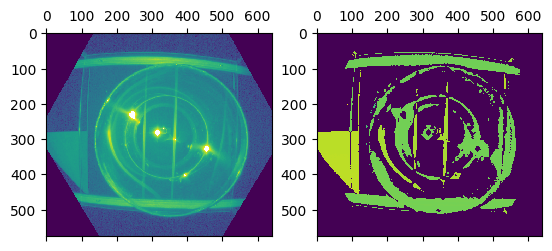

In [30]:
capture = k4a_obj.get_capture()

capture.color.shape, capture.ir.shape, capture.depth.shape

plt.imshow(capture.color)

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.matshow(np.log(capture.ir+1))
ax2.matshow(np.log(capture.depth+1))

In [28]:
k4a_obj.stop()

In [29]:
k4a_obj2.stop()

NameError: name 'k4a_obj2' is not defined